In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)
set_session(sess)

Using TensorFlow backend.


In [3]:
# load validation informaiton
f= open('/data/tiny-imagenet-200/original/val/val_annotations.txt')

array=[]

for line in f.readlines():
    array.append([])
    for i in line.split():
        array[-1].append(i)

print len(array)
# print array

10000


In [4]:
# seperate val images
import os, shutil

# original_dataset_dir = '/home/dkkim/downloads/tiny-imagenet-200/original/val/images'
# train_dir = '/home/dkkim/downloads/tiny-imagenet-200/train'
# val_dir = '/home/dkkim/downloads/tiny-imagenet-200/val'

# base_dir = '/home/dkkim/downloads/tiny-imagenet-200/val'
# if not os.path.exists(base_dir):os.mkdir(base_dir)
    
#train,validation,test dir

# validation_dir=os.path.join(base_dir,'images')
# if not os.path.exists(validation_dir): os.mkdir(validation_dir)
    
# for i in range(10000):
#     dir = os.path.join(base_dir,array[i][1])
    
#     fname = array[i][0]
# #     print array[i][0],array[i][1]
#     if not os.path.exists(dir):os.mkdir(dir)
#     src=os.path.join(original_dataset_dir,fname)
#     dst=os.path.join(dir,fname)
#     shutil.copyfile(src,dst)
    

    
    


In [2]:
#pre processing

train_dir = '/data/tiny-imagenet-200/train'
val_dir = '/data/tiny-imagenet-200/val'

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,width_shift_range =0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_2 = train_datagen.flow_from_directory(train_dir,target_size=(128,128),batch_size=200,class_mode='categorical')

validation_generator_2 = val_datagen.flow_from_directory(val_dir,target_size=(128,128),batch_size=200,class_mode='categorical')



Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.


In [3]:
# model
from keras import layers
from keras import models
from keras import regularizers
from keras.layers.normalization import BatchNormalization

model=models.Sequential()

model.add(layers.convolutional.ZeroPadding2D((1,1),input_shape=(128,128,3)))
model.add(layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(256,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(256,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(256,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(512,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(512,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(512,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.convolutional.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(512,(3,3),activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((7,7)))

model.add(layers.Flatten())
model.add(layers.Dense(1024,kernel_regularizer=regularizers.l2(0.001),activation='relu', kernel_initializer='he_normal'))
model.add(layers.Dense(200,kernel_regularizer=regularizers.l2(0.001),activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 130, 130, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 130, 130, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 130, 130, 64)      0         
__________

In [4]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint,LearningRateScheduler,Callback
import os, shutil
import math

# learning rate log
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

## learning rate decay

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 15
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop)) # lr = lr0 * drop^floor(epoch / epochs_drop)
    return lrate

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self,batch,logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))

loss_history = LossHistory()

## model compile

optimizer = optimizers.RMSprop(lr=0.001)
lr_metric = get_lr_metric(optimizer)

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['acc',lr_metric])
lrate = LearningRateScheduler(step_decay)
# check point
log_dir='/data/tiny_2_log'
log_data_dir=os.path.join(log_dir,'log_6') ################ version
if not os.path.exists(log_data_dir): os.mkdir(log_data_dir)
    
filepath=os.path.join(log_data_dir,'weights.{epoch:02d}-{val_acc:.2f}.hdf5')
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint,lrate]


#training
history=model.fit_generator(train_generator_2,steps_per_epoch=500,epochs=30,callbacks=callbacks_list,validation_data=validation_generator_2,validation_steps=50)



# model.save

model_weight=os.path.join(log_data_dir,'tiny_2_imagenet.h5')
model_arch=os.path.join(log_data_dir,'tiny_2_imagenet.json')

model.save(model_weight)
with open(model_arch,'w') as f:
    f.write(model.to_json())
    
import csv

dict = history.history

csv_path=os.path.join(log_data_dir,'tiny_2_log.csv')

w = csv.writer(open(csv_path, "w"))
for key, val in dict.items():
    w.writerow([key, val])


Epoch 1/30
500/500 [==============================] - 481s 962ms/step - loss: 5.8340 - acc: 0.0406 - lr: 0.0010 - val_loss: 6.1830 - val_acc: 0.0345 - val_lr: 0.0010
Epoch 2/30
500/500 [==============================] - 472s 943ms/step - loss: 4.3894 - acc: 0.1107 - lr: 0.0010 - val_loss: 4.3989 - val_acc: 0.1196 - val_lr: 0.0010
Epoch 3/30
500/500 [==============================] - 472s 944ms/step - loss: 4.0542 - acc: 0.1685 - lr: 0.0010 - val_loss: 4.1706 - val_acc: 0.1606 - val_lr: 0.0010
Epoch 4/30
500/500 [==============================] - 472s 944ms/step - loss: 3.8523 - acc: 0.2159 - lr: 0.0010 - val_loss: 4.2976 - val_acc: 0.1735 - val_lr: 0.0010
Epoch 5/30
500/500 [==============================] - 472s 944ms/step - loss: 3.6982 - acc: 0.2568 - lr: 0.0010 - val_loss: 3.8255 - val_acc: 0.2475 - val_lr: 0.0010
Epoch 6/30
500/500 [==============================] - 472s 944ms/step - loss: 3.5788 - acc: 0.2944 - lr: 0.0010 - val_loss: 3.6808 - val_acc: 0.2881 - val_lr: 0.0010
Epoc

NameError: name 'model_2' is not defined

In [5]:

# model.save

model_weight=os.path.join(log_data_dir,'tiny_2_imagenet.h5')
model_arch=os.path.join(log_data_dir,'tiny_2_imagenet.json')

model.save(model_weight)
with open(model_arch,'w') as f:
    f.write(model.to_json())
    
import csv

dict = history.history

csv_path=os.path.join(log_data_dir,'tiny_2_log.csv')

w = csv.writer(open(csv_path, "w"))
for key, val in dict.items():
    w.writerow([key, val])

In [28]:
for layer in model.layers:
    print (layer, '\n')
    print(layer., layer.get_weights())


(<keras.layers.convolutional.ZeroPadding2D object at 0x7f2e067a58d0>, '\n')
({'name': 'zero_padding2d_5', 'dtype': 'float32', 'trainable': True, 'data_format': 'channels_last', 'padding': ((1, 1), (1, 1)), 'batch_input_shape': (None, 64, 64, 3)}, [])
(<keras.layers.convolutional.Conv2D object at 0x7f2e296012d0>, '\n')
({'padding': 'valid', 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'distribution': 'uniform', 'scale': 1.0, 'seed': None, 'mode': 'fan_avg'}}, 'name': 'conv2d_8', 'bias_regularizer': None, 'filters': 64, 'bias_constraint': None, 'activation': 'relu', 'trainable': True, 'data_format': 'channels_last', 'kernel_constraint': None, 'strides': (1, 1), 'dilation_rate': (1, 1), 'kernel_regularizer': None, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'use_bias': True, 'activity_regularizer': None, 'kernel_size': (3, 3)}, [array([[[[ 0.07798229,  0.05787009,  0.09384591, ..., -0.07573827,
           0.00620476,  0.03488709],
         [ 0.09162841

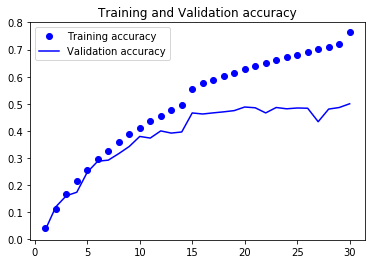

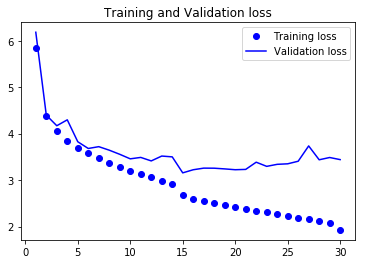

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,'bo',label = 'Training accuracy')
plt.plot(epochs, val_acc,'b',label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# with open('/home/dkkim/documents/tiny_log_2.txt','w') as output:
#     output.write(str(history.history))
    



In [84]:
from keras import backend as K 

# Do some code, e.g. train and save model

K.clear_session()

#del model

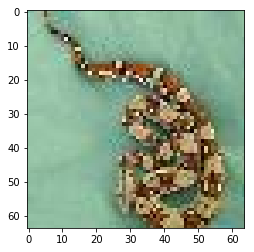

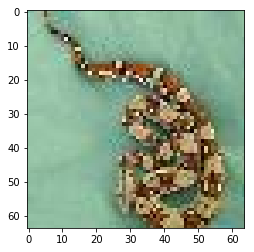

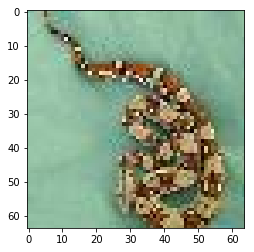

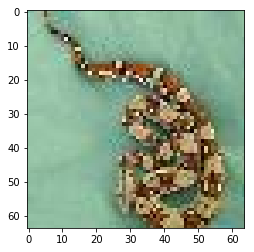

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os, shutil

path_check='/data/tiny-imagenet-200/train/n01742172/images'
fnames = sorted([os.path.join(path_check, fname) for fname in os.listdir(path_check)])


img_path = fnames[133]

img = image.load_img(img_path, target_size=(64,64))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# datagen = ImageDataGenerator(rotation_range=20,width_shift_range =0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
datagen = ImageDataGenerator()

j=0
for batch in datagen.flow(x, batch_size =1):
    plt.figure(j)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    j += 1
    if j%4 ==0:
        break
        
plt.show()